In [1]:
!ls

Correlation_Distribution_Multicollinearity-class.ipynb
Correlation_Distribution_Multicollinearity.ipynb
EDA_taster.ipynb
Imagesfornotebook.zip
air_quality_no2_long.csv


In [3]:
import pandas as pd

In [4]:
air=pd.read_csv('air_quality_no2_long.csv')

In [9]:
air.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [8]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       2068 non-null   object 
 1   country    2068 non-null   object 
 2   date.utc   2068 non-null   object 
 3   location   2068 non-null   object 
 4   parameter  2068 non-null   object 
 5   value      2068 non-null   float64
 6   unit       2068 non-null   object 
dtypes: float64(1), object(6)
memory usage: 113.2+ KB


In [7]:
air.describe()

,value
count,2068.000000
mean,26.261847
std,13.479451
min,0.000000
25%,17.000000
50%,25.000000
75%,33.000000
max,97.000000


<AxesSubplot:>

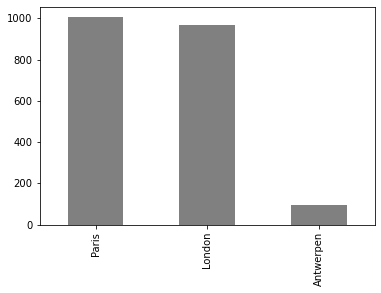

In [14]:
air['city'].value_counts().plot(kind='bar',color='grey')

In [18]:
air['date.utc']=pd.to_datetime(air['date.utc'],errors='coerce')

In [19]:
air['date.utc'].unique()

<DatetimeArray>
['2019-06-21 00:00:00+00:00', '2019-06-20 23:00:00+00:00',
 '2019-06-20 22:00:00+00:00', '2019-06-20 21:00:00+00:00',
 '2019-06-20 20:00:00+00:00', '2019-06-20 19:00:00+00:00',
 '2019-06-20 18:00:00+00:00', '2019-06-20 17:00:00+00:00',
 '2019-06-20 16:00:00+00:00', '2019-06-20 15:00:00+00:00',
 ...
 '2019-06-01 05:00:00+00:00', '2019-06-01 04:00:00+00:00',
 '2019-06-01 03:00:00+00:00', '2019-05-25 05:00:00+00:00',
 '2019-05-25 04:00:00+00:00', '2019-05-25 03:00:00+00:00',
 '2019-05-16 06:00:00+00:00', '2019-05-11 05:00:00+00:00',
 '2019-05-11 04:00:00+00:00', '2019-05-11 03:00:00+00:00']
Length: 1033, dtype: datetime64[ns, UTC]

In [20]:
air['hour']=pd.DatetimeIndex(air['date.utc']).hour

In [30]:
air['day']=pd.DatetimeIndex(air['date.utc']).day

In [31]:
air['date']=pd.DatetimeIndex(air['date.utc']).date

In [27]:
air['weekday']=air['date.utc'].dt.strftime('%a')

In [35]:
air.head()

,city,country,date.utc,location,parameter,value,unit,hour,date,weekday,day,date_hour
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,0,2019-06-21,Fri,21,2019-06-21 00:00:00+00:00
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,23,2019-06-20,Thu,20,2019-06-20 23:00:00+00:00
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,22,2019-06-20,Thu,20,2019-06-20 22:00:00+00:00
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,21,2019-06-20,Thu,20,2019-06-20 21:00:00+00:00
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,20,2019-06-20,Thu,20,2019-06-20 20:00:00+00:00


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt 

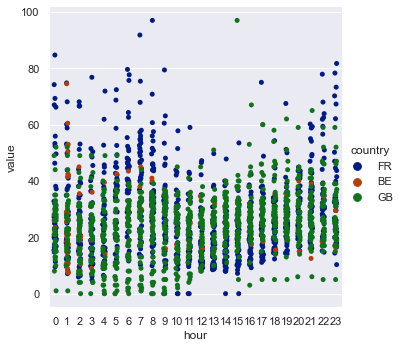

In [47]:
#sns.set(rc = {'figure.figsize':(10,20)})
sns.catplot(data=air, x='hour', y='value', hue='country',
           ci='sd',palette='dark')

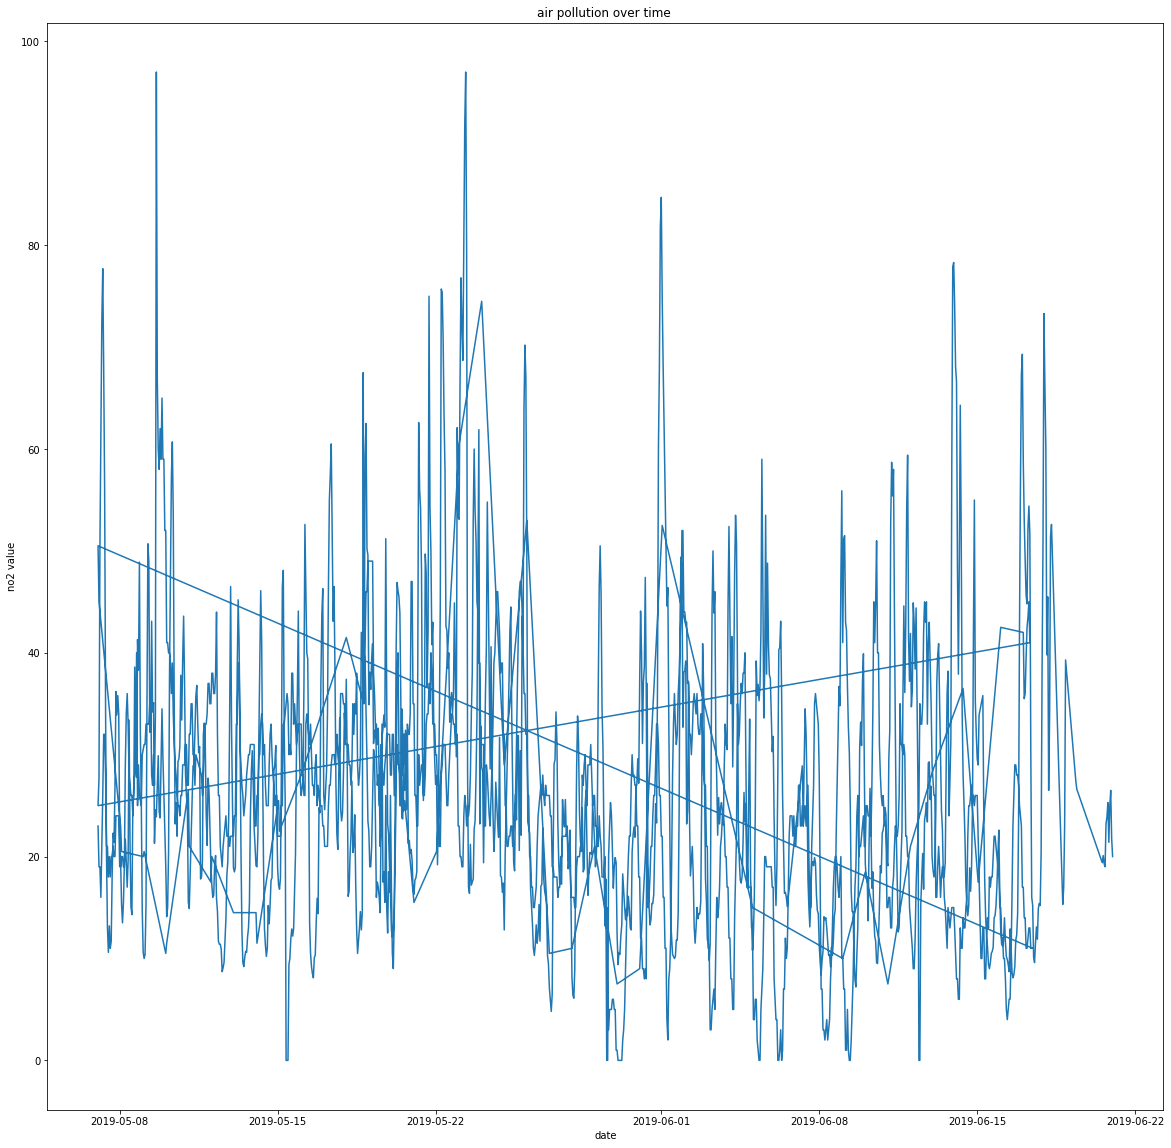

In [40]:
plt.figure(figsize=(20,20))
plt.plot(air['date.utc'], air['value'])
plt.title('air pollution over time ')
plt.xlabel('date')
plt.ylabel('no2 value')
plt.show()